<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 07-2 de Data Science

## Árvores de Decisão Avançado (Random Forests)

* **Case de distribuição de e-commerce**
* Tempo estimado: **40** minutos

# Objetivos

* Após completar esta aula, você será capaz de:

    * Obter os dados do case
    * Realizar um pré processamento nos dados
    * Realizar uma classificação supervisionada através de `Florestas Aleatórias`
    * Medir o desempenho do modelo de classificação

# Bibliotecas

In [1]:
# check Python version
!python -V

import pandas as pd # download library to read data into dataframe
import numpy as np # import numpy library
import matplotlib as mpl
import matplotlib.pyplot as plt # plots
import collections
import random # library for random number generation

import matplotlib.pyplot as plt
import seaborn as sns

# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix # Não usaremos essas métricas neste exemplo
import matplotlib.pyplot as plt

#!conda install python-graphviz --yes
import graphviz
from sklearn.tree import export_graphviz
import itertools

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

# Visualizando os estilos de gráficos disponibilizados pelo matplotlib
print(plt.style.available)
# Usando um estilo
mpl.style.use(['ggplot']) 

Python 3.9.7
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Obtendo Dados

In [2]:
file_path = "https://raw.githubusercontent.com/EduPek/PPGOLD7037/main/Data/Distribution_12k.csv"
starsData = pd.read_csv(file_path)

# Pré Processamento

In [3]:
# Obtendo o nome das colunas
column_names = starsData.columns.values

# Alterando a primeira posição da lista para 'stars'
column_names[0] = "stars"

# Passando o novo nome para  o dataframe
starsData.columns = column_names

starsData = starsData[starsData["stars"] <= 5]
starsData = starsData[starsData["stars"] >= 1]

starsData = starsData[starsData["FloorCD"] <= 4] 
starsData = starsData[starsData["FloorCD"] >= 0]

starsData = starsData[starsData["RoutDeliveryOrder"] <= 6]
starsData = starsData[starsData["RoutDeliveryOrder"] >= 1]

# É importante refazer o indice do dataFrame, após excluir linhas, pois pode gerar problema no SciKit Learn
starsData = starsData.reset_index(drop=True) 

# variáveis Dependentes e independentes the DataFrame
# split the DataFrame
# Só a coluna "stars"
dependentVariableStars = starsData["stars"].copy(deep=True) 

# Todas as outras colunas com excessão da "stars"
independetVariables = starsData.drop(columns=['stars']).copy(deep=True)

enc = OneHotEncoder(handle_unknown='ignore', sparse= False)

prod_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['Product']])).astype(int)
prod_encoded.columns = enc.get_feature_names_out(['Product'])

origin_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['Origin']])).astype(int)
origin_encoded.columns = enc.get_feature_names_out(['Origin'])

CD_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['CD_name']])).astype(int)
CD_encoded.columns = enc.get_feature_names_out(['CD_name'])

Destination_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['Dest']])).astype(int)
Destination_encoded.columns = enc.get_feature_names_out(['Dest'])

TruckType_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['TruckType']])).astype(int)
TruckType_encoded.columns = enc.get_feature_names_out(['TruckType'])

TruckType2_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['TruckType2']])).astype(int)
TruckType2_encoded.columns = enc.get_feature_names_out(['TruckType2'])

DriverCD_C_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['DriverCD_C']])).astype(int)
DriverCD_C_encoded.columns = enc.get_feature_names_out(['DriverCD_C'])

independetVariablesEncoded = pd.concat([prod_encoded, origin_encoded, CD_encoded, Destination_encoded, TruckType_encoded, TruckType2_encoded, DriverCD_C_encoded, independetVariables["RoutDeliveryOrder"], independetVariables["FloorCD"]], axis=1)

dependentVariableStars = pd.DataFrame({'stars':dependentVariableStars})

bad_conditions = dependentVariableStars['stars'] <= 2
average_conditions = dependentVariableStars['stars'] == 3
good_conditions = dependentVariableStars['stars'] >= 4

dependentVariableStars[bad_conditions] = "bad"
dependentVariableStars[average_conditions] = "average"
dependentVariableStars[good_conditions] = "good"

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was re

# Random Forests

## Train Test Split

In [4]:
print('Shape das variáveis independentes',independetVariablesEncoded.shape)
print('Shape das variáveis dependetes',dependentVariableStars.shape)

Shape das variáveis independentes (12281, 65)
Shape das variáveis dependetes (12281, 1)


In [5]:
splited = train_test_split(independetVariablesEncoded, dependentVariableStars, test_size=0.3) # 70% training and 30% test
splited

[       Product_P1  Product_P10  Product_P11  Product_P12  Product_P13  \
 5565            0            0            0            0            0   
 4768            0            1            0            0            0   
 8635            0            0            0            0            0   
 2245            0            0            0            0            1   
 6839            0            0            0            0            0   
 ...           ...          ...          ...          ...          ...   
 4653            0            0            0            0            0   
 1552            0            0            0            0            0   
 1777            0            0            0            0            0   
 11833           0            0            0            1            0   
 2807            0            0            0            0            0   
 
        Product_P14  Product_P15  Product_P2  Product_P3  Product_P4  ...  \
 5565             0            1 

In [6]:
independetVariablesEncodedTrain = splited[0]
print('Shape do dataframe com as variáveis independentes que serão usadas para treinar o modelo:\n',independetVariablesEncodedTrain.shape)


Shape do dataframe com as variáveis independentes que serão usadas para treinar o modelo:
 (8596, 65)


In [7]:
independetVariablesEncodedTest = splited[1]
print('Shape do dataframe com as variáveis independentes que serão usadas para testar o modelo:\n',independetVariablesEncodedTest.shape)


Shape do dataframe com as variáveis independentes que serão usadas para testar o modelo:
 (3685, 65)


In [8]:
dependentVariableStarsTrain =  splited[2]
print('Shape do dataframe com a variável dependentes que serão usadas para treinar o modelo:\n',dependentVariableStarsTrain.shape)


Shape do dataframe com a variável dependentes que serão usadas para treinar o modelo:
 (8596, 1)


In [9]:
dependentVariableStarsTest =  splited[3]
print('Shape do dataframe com a variável dependentes que serão usadas para testar o modelo:\n',dependentVariableStarsTest.shape)


Shape do dataframe com a variável dependentes que serão usadas para testar o modelo:
 (3685, 1)


## Grid Search - Melhores Parâmetros

In [10]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[3,10,15,20,30,60,65,70,80,100,200,500]}

grid = GridSearchCV(tree.DecisionTreeClassifier(random_state= 100), tree_param, cv=5)
grid.fit(independetVariablesEncodedTrain,dependentVariableStarsTrain)

randonsForests = RandomForestClassifier(n_estimators=1000, criterion=grid.best_params_['criterion'], max_depth=grid.best_params_['max_depth'])
randonsForests.fit(independetVariablesEncodedTrain,dependentVariableStarsTrain)

dependentVariableStarsPredicted = randonsForests.predict(independetVariablesEncodedTest)
print("Accuracy:",accuracy_score(dependentVariableStarsTest, dependentVariableStarsPredicted))

C:\Users\User\AppData\Local\Temp\ipykernel_11088\2503278282.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randonsForests.fit(independetVariablesEncodedTrain,dependentVariableStarsTrain)


Accuracy: 0.9715061058344641


Text(0.5, 24.0, 'Classes Preditas')

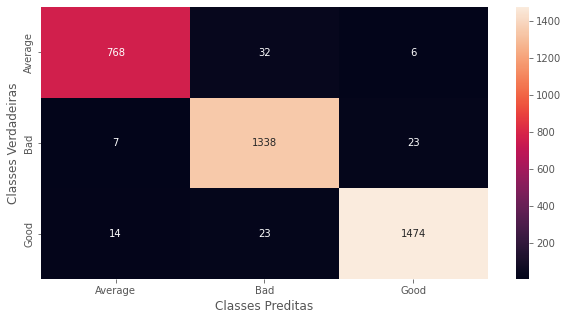

In [11]:
confusion_matrix_random_forests = confusion_matrix(dependentVariableStarsTest, dependentVariableStarsPredicted)
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.heatmap(confusion_matrix_random_forests, annot=True, xticklabels = ["Average","Bad","Good"], yticklabels = ["Average","Bad","Good"],fmt='.4g',ax=ax)
plt.ylabel('Classes Verdadeiras')
plt.xlabel('Classes Preditas')

In [12]:
# Importância de cada feature
df_importance = pd.DataFrame({'variable':independetVariablesEncodedTrain.columns,'importance':randonsForests.feature_importances_ })

conditions = df_importance['importance'] > 0.02

# Selecionar as mais importantes para mostrar
VariableImportance = df_importance[conditions]

VariableImportance.set_index(keys='variable',inplace=True)

VariableImportance.index.name = None
VariableImportance.columns.name = None

VariableImportance.sort_values(by='importance',inplace=True,ascending=True)

VariableImportance.head(10)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,importance
TruckType_SemiTrailler,0.021755
TruckType_Truck,0.021835
TruckType2_MiniVan,0.022194
Origin_F1,0.026428
TruckType2_CityDeliveryTruck,0.027148
Origin_F4,0.027316
Origin_F2,0.027406
Origin_F3,0.027938
TruckType2_Van,0.029320
FloorCD,0.090384


Text(0, 0.5, 'Variables')

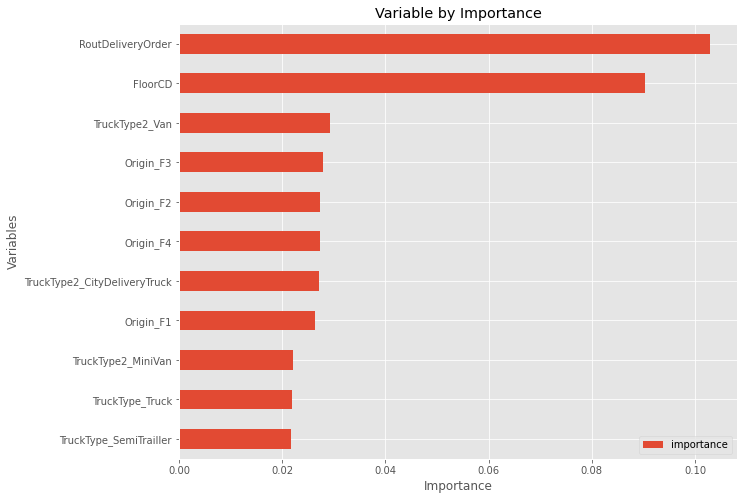

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
VariableImportance.plot(kind='barh',ax=ax)
ax.set_title('Variable by Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Variables')

## Aplicando o Modelo na Base Completa

In [14]:
dependentVariableStars.head()

,stars
0,good
1,bad
2,good
3,bad
4,good


In [15]:
dependentVariableStars.shape

(12281, 1)

In [19]:
dfStarsFrequency = dependentVariableStars["stars"].value_counts().to_frame()
dfStarsFrequency.sort_index(inplace= True)
dfStarsFrequency.reset_index(inplace=True)
dfStarsFrequency.columns=['stars','freq']
dfStarsFrequency.head(10)

,stars,freq
0,average,2769
1,bad,4686
2,good,4826


<AxesSubplot: title={'center': 'Stars by Freq'}, ylabel='stars'>

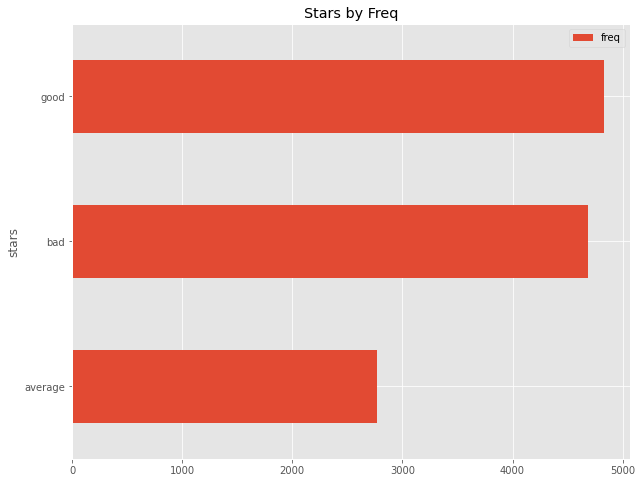

In [25]:
dfStarsFrequency.plot(kind='barh',x='stars',y= 'freq',figsize=(10,8),title='Stars by Freq')

In [26]:
dependentVariableStarsAllPredicted = randonsForests.predict(independetVariablesEncoded)
dependentVariableStarsAllPredicted.shape

(12281,)

In [27]:
confusion_matrix_all = confusion_matrix(dependentVariableStars, dependentVariableStarsAllPredicted)

Text(0.5, 24.0, 'Predicted label')

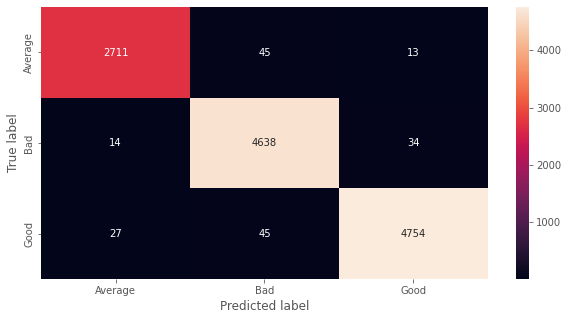

In [28]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.heatmap(confusion_matrix_all, annot=True, xticklabels = ["Average","Bad","Good"], yticklabels = ["Average","Bad","Good"], fmt='.4g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [29]:
starsData['predicao_correta'] = (dependentVariableStars['stars'] == dependentVariableStarsAllPredicted)
starsData['predicao_correta'] = starsData['predicao_correta'].apply(lambda x : 'Correto' if x==True else 'Incorreto' )

In [30]:
starsData.head()

,stars,Product,Origin,CD_name,Dest,DistanceTravelled_Fac_CD,TruckType,DriverF_CD,DaysStocked,FloorCD,DistanceTravelled_CD_Client,TruckType2,DriverCD_C,RoutDeliveryOrder,predicao_correta
0,4.0,P6,F4,CD2,C203,162,SemiTrailler,D05,37,2,59.7,CityDeliveryTruck,D2_2,2,Correto
1,1.0,P2,F3,CD2,C202,162,SemiTrailler,D06,5,0,94.2,MiniVan,D2_4,3,Correto
2,5.0,P6,F3,CD2,C202,162,SemiTrailler,D04,27,0,30.9,Van,D2_7,1,Correto
3,2.0,P9,F3,CD2,C202,162,SemiTrailler,D03,14,0,89.7,Van,D2_7,3,Correto
4,5.0,P9,F2,CD3,C305,58,Truck,D03,30,1,171.7,Van,D3_2,6,Correto


In [31]:
data_grouped = starsData['predicao_correta'].value_counts()
data_grouped.head()

Correto      12103
Incorreto      178
Name: predicao_correta, dtype: int64

<AxesSubplot: title={'center': 'Predições Corretas'}, ylabel='predicao_correta'>

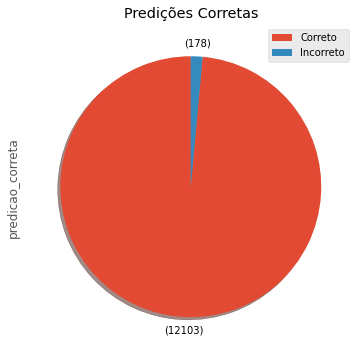

In [32]:
def format_label(value):
    return f'({round(value*sum(data_grouped)/100)})'

data_grouped.plot(
                    kind='pie'
                    ,title= 'Predições Corretas'
                    ,figsize=(8,6)
                    ,autopct=format_label
                    ,pctdistance=1.1
                    ,startangle=90
                    ,shadow=True       
                    ,legend=True
                    ,labels = None
                )

# Referências

[1] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[2] https://scikit-learn.org/stable/modules/cross_validation.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[4] https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf

[5] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Desenvolvido por <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 03-10-2021       | 1.0     | Eduardo Pecora    | Criação               |

<hr>

